In [1]:
from sklearn.datasets import make_regression
import pandas as pd
import numpy as np

import plotly.express as px
import plotly.graph_objects as go

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [2]:
X,y = make_regression(n_samples=100, n_features=2, n_informative=2, n_targets=1, noise=50)

In [3]:


df = pd.DataFrame({'feature1':X[:,0],'feature2':X[:,1],'target':y})
     

In [4]:
df.shape

(100, 3)

In [6]:
df.head()

,feature1,feature2,target
0,0.391885,-0.846264,-102.845883
1,-0.132165,0.189704,34.502047
2,-0.356003,0.228540,30.532422
3,-1.575615,0.016199,9.172748
4,-2.026413,1.303147,37.682376


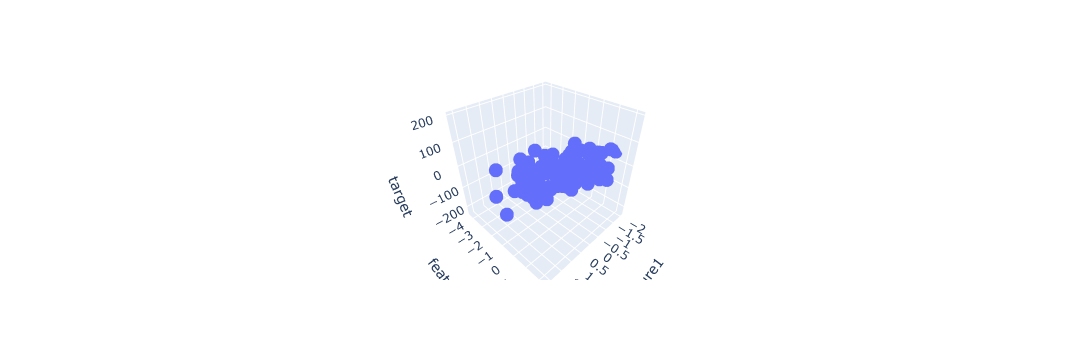

In [22]:
fig = px.scatter_3d(df, x='feature1', y='feature2', z='target')

fig.show()

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=3)

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
lr = LinearRegression()
     

In [12]:


lr.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [15]:
y_pred = lr.predict(X_test)

In [16]:

print("MAE",mean_absolute_error(y_test,y_pred))
print("MSE",mean_squared_error(y_test,y_pred))
print("R2 score",r2_score(y_test,y_pred))
     

MAE 41.993313082268024
MSE 2885.6813389900253
R2 score 0.6651091237600599


In [20]:
x = np.linspace(-5, 5, 10)
y = np.linspace(-5, 5, 10)

xGrid, yGrid = np.meshgrid(x, y)

# Step 1: Create final first
final = np.vstack((
    xGrid.ravel().reshape(1,100),
    yGrid.ravel().reshape(1,100)
)).T

# Step 2: Now predict
z_final = lr.predict(final).reshape(10,10)

z = z_final


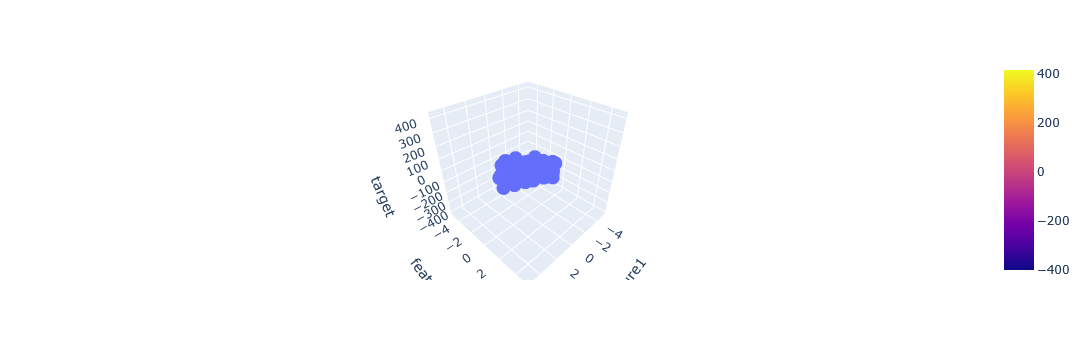

In [21]:
fig = px.scatter_3d(df, x='feature1', y='feature2', z='target')

fig.add_trace(go.Surface(x = x, y = y, z =z ))

fig.show()
     